In [1]:
import gzip
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

## Извлечение исходных данных из архивов

In [2]:
project_path =  Path.cwd().parent
data_path = project_path / "data"
raw_path = data_path / "raw"
preproc_path = data_path / "preprocessed"

files = [
"train-images-idx3-ubyte",
"train-labels-idx1-ubyte",
"t10k-images-idx3-ubyte",
"t10k-labels-idx1-ubyte"
]

source_train_im_path = preproc_path / "train-images-idx3-ubyte.bin"
source_train_l_path = preproc_path / "train-labels-idx1-ubyte.bin"
source_test_im_path = preproc_path / "t10k-images-idx3-ubyte.bin"
source_test_l_path = preproc_path / "t10k-labels-idx1-ubyte.bin"


In [3]:
for base in files:
    with open(raw_path / (base + ".gz"), "rb") as f:
        decompressed = gzip.decompress(f.read())
    with open(preproc_path / (base + ".bin"), "wb") as f:
        f.write(decompressed)

## Считывание данных из бинарных файлов

### Обучающая выборка

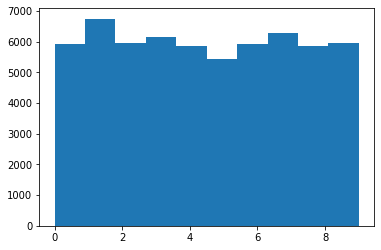

In [4]:
# Метки обуающей выборки
train_labels = np.fromfile(source_train_l_path, dtype=np.uint8, offset=8)
plt.hist(train_labels);

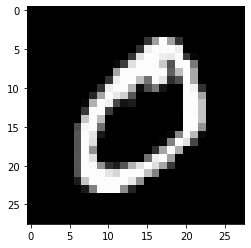

In [5]:
# Изображения обучающей выборки
train_size, rows, columns = 60000, 28, 28
train_images = np.fromfile(source_train_im_path, dtype=np.uint8, offset=16).reshape((train_size, rows, columns))
plt.imshow(train_images[1,:,:], cmap='gray')

### Тестовая выборка

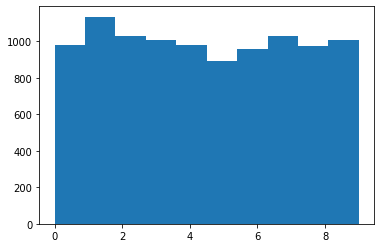

In [6]:
# Метки тестовой выборки
test_labels = np.fromfile(source_test_l_path, dtype=np.uint8, offset=8)
plt.hist(test_labels);

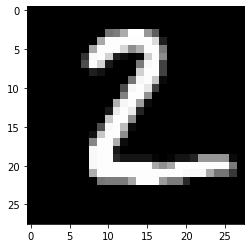

In [7]:
# Изображения тестовой выборки
test_size, rows, columns = 10000, 28, 28
test_images = np.fromfile(source_test_im_path, dtype=np.uint8, offset=16).reshape((test_size, rows, columns))
plt.imshow(test_images[1,:,:], cmap='gray')

## Создадим модель 

In [8]:
import sys
sys.path.append('../')

In [9]:
from core.models import MNISTDense
from core.initializers import He
from core.optimizers import GradDesc
from core.layers import Dense
from core.losses import Crossentropy
from core.activations import ReLu, Softmax

In [10]:
model = MNISTDense(
    input_size=28*28,
    layers_sizes=[32,16, 10],
    initializers_classes=[He, He, He],
    activations_classes=[ReLu, ReLu, Softmax],
    optimizer=GradDesc(0.08),
    loss=Crossentropy
)

In [11]:
history = model.fit(train_images[:1000].reshape(1000, -1), train_labels[:1000])

ValueError: could not broadcast input array from shape (32) into shape (16)